In [1]:
## Jane street puzzle

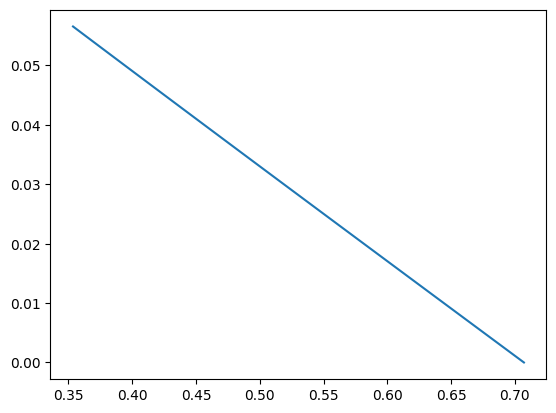

In [2]:
import numpy as np
from math import pi
import matplotlib.pyplot as plt

def Erin_win(r):
    a = 1/(2*np.sqrt(2)) - r/2
    b = pi
    return np.arcsin(a)/b

a = 1/(2*np.sqrt(2))

x_values = np.linspace(a,2*a, 100)
y_values = Erin_win(x_values)


plt.plot(x_values, y_values)
plt.show()


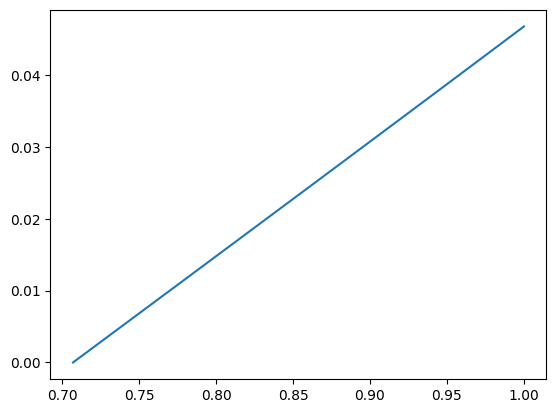

In [4]:
def Erin_win2(r):
    a = 1/(2*np.sqrt(2)) - r/2
    a = -a
    b = pi
    return np.arcsin(a)/b

a = 1/(2*np.sqrt(2))

x_values = np.linspace(2*a,1, 100)
y_values = Erin_win2(x_values)


plt.plot(x_values, y_values)
plt.show()

In [5]:
A = 0.04348788813888 + 1/8


In [6]:
print(f'{A:.10f}')

0.1684878881


In [3]:
a = 1/(2*np.sqrt(2))

In [133]:
def game_simulation(r, r_flag):
    # Take in entry the lenght that Eerin should choose to maximize his chance of winning, and the place of the flag

    # const is the distance from Aaron
    dist_Aaron = abs(r_flag - 2*a)

    # The random angle that Eerin choose
    theta = np.random.uniform(0,2*pi)

    # From the angle and the r given, we compute the distance with the flag
    point1 = np.array([r_flag, 0])
    point2 = np.array([r*np.cos(theta), r*np.sin(theta)])
    dist_Eerin = np.linalg.norm(point2-point1)


    # if Eeerin win we return True
    if dist_Eerin < dist_Aaron:
        return True
    else:
        return False


In [158]:
# now we do 10000 simulation for different r and check which ones gives the best odd of wining for Eerin

diff_r_flag = np.linspace(a,2*a,10)
num_sim = 200000
final = []

for r_flag in diff_r_flag:
    exp = []
    diff_r = np.linspace(0,1,100)
    for r_i in diff_r:
        w=0
        for i in range(num_sim):
            if game_simulation(r_i,r_flag):
                w += 1
            else:
                continue
        exp.append(w/num_sim)
    maxi = np.argmax(exp)
    print(f'for {r_flag} the best for Eerin is to go {diff_r[maxi]} with a proba of wining of {exp[maxi]} ')
    final += [(r_flag,diff_r[maxi],exp[maxi])]


for 0.35355339059327373 the best for Eerin is to go 0.010101010101010102 with a proba of wining of 0.49553 
for 0.39283710065919303 the best for Eerin is to go 0.24242424242424243 with a proba of wining of 0.296555 
for 0.4321208107251123 the best for Eerin is to go 0.3434343434343435 with a proba of wining of 0.2192 
for 0.4714045207910317 the best for Eerin is to go 0.4040404040404041 with a proba of wining of 0.167325 
for 0.5106882308569509 the best for Eerin is to go 0.48484848484848486 with a proba of wining of 0.1262 
for 0.5499719409228703 the best for Eerin is to go 0.5252525252525253 with a proba of wining of 0.092905 
for 0.5892556509887896 the best for Eerin is to go 0.5858585858585859 with a proba of wining of 0.064185 
for 0.6285393610547089 the best for Eerin is to go 0.6363636363636365 with a proba of wining of 0.04039 
for 0.6678230711206281 the best for Eerin is to go 0.6666666666666667 with a proba of wining of 0.018505 
for 0.7071067811865475 the best for Eerin is t

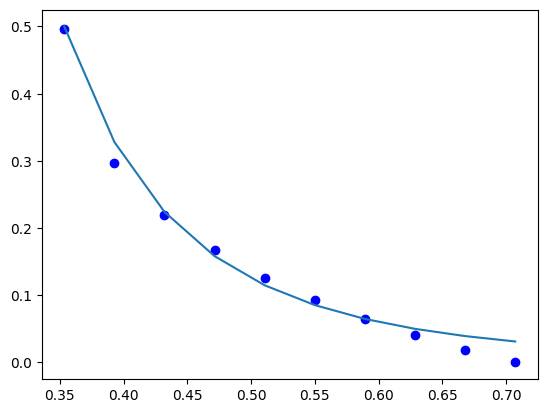

In [162]:
plt.plot(*[[elem[i] for elem in final] for i in range(3) if i%2== 0], 'bo') 
x_values = [elem[0] for elem in final]
my_fun = lambda x: (a/x)**(4)/2
plt.plot(x_values,[my_fun(x) for x in x_values])
plt.show()

In [ ]:
import sympy as sp

# Define symbols
r_o, r = sp.symbols('r_o r')

# Define the function
expr = sp.acos((r_o**2 + r**2 + r - 1/np.sqrt(2)) / (2 * r_o * r))

# Differentiate with respect to r
expr_prime = sp.diff(expr, r)

# Solve for critical points
critical_points = sp.solve(expr_prime, r)

# Find the maximum value of r for each critical point
max_r_expr = None
max_value = float('-inf')

for cp in critical_points:
    if cp.is_real:
        # Substitute the critical point into the expression for r
        r_expr = cp
        value = expr.subs(r, cp)
        if value > max_value:
            max_value = value
            max_r_expr = r_expr

# Display the expression of r in terms of r_o for the maximum value
print("Expression of r in terms of r_o for the maximum value:")
print(max_r_expr)

In [182]:
def fun_max(r_o, r):
    # r_o is the optimal that need to be found
    a = 1/np.sqrt(2)
    b = (r_o**2 + r**2 + r - a)/(2*r_o*r)
    c = np.arccos(b)

    return b

fun_max(0.8,a)

0.7273417190192725

In [183]:
import sympy as sp

# Define symbols
r_o, r = sp.symbols('r_o r')

# Define the function
expr = (r_o**2 + r**2 + r - 1/sp.sqrt(2)) / (2 * r_o * r)

# Find the derivative with respect to r_o
derivative_expr = sp.diff(expr, r_o)

# Print the derivative expression
print("Derivative of the function with respect to r_o:")
print(derivative_expr)


Derivative of the function with respect to r_o:
1/r - (r**2 + r + r_o**2 - sqrt(2)/2)/(2*r*r_o**2)


In [184]:
# Equate the derivative to 0 and solve for r_o
critical_points = sp.solve(derivative_expr, r_o)

# Print the expression for r_o that satisfies the derivative equals 0
print("Expression for r_o that satisfies the derivative equals 0:")
print(critical_points)


Expression for r_o that satisfies the derivative equals 0:
[-sqrt(4*r**2 + 4*r - 2*sqrt(2))/2, sqrt(4*r**2 + 4*r - 2*sqrt(2))/2]


In [206]:
# function that return the optimal lenght for Eerin to go between 1/2√2 and 1/√2
def opt_move_Eerin(y):
    c = np.sqrt(2)
    return np.sqrt(c*y - 1/2)

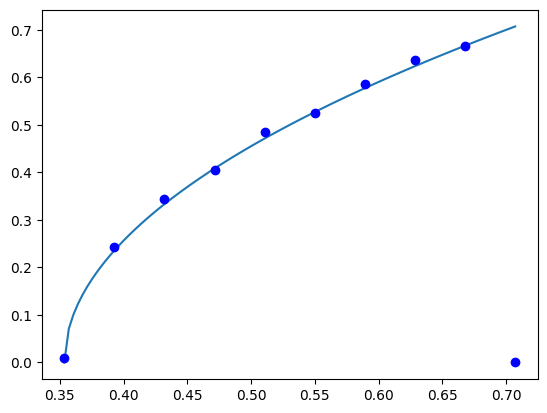

In [207]:
# Generate y values
y_values = np.linspace(a, 2*a, 100 )

# Compute the corresponding function values
function_values = opt_move_Eerin(y_values)

# Plot the function
plt.plot(y_values, function_values)
plt.plot(*[[elem[i] for elem in final] for i in range(2)], 'bo') 
plt.show()

/var/folders/s2/myvbmwhd6_q3sbxkqwg5whp80000gn/T/ipykernel_54902/3412581520.py:5: RuntimeWarning: invalid value encountered in divide
  A = (r_o**2 + r*c - 1/2)/(2*r_o*r)
/var/folders/s2/myvbmwhd6_q3sbxkqwg5whp80000gn/T/ipykernel_54902/3412581520.py:6: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(A)/pi
/var/folders/s2/myvbmwhd6_q3sbxkqwg5whp80000gn/T/ipykernel_54902/3412581520.py:5: RuntimeWarning: invalid value encountered in scalar divide
  A = (r_o**2 + r*c - 1/2)/(2*r_o*r)


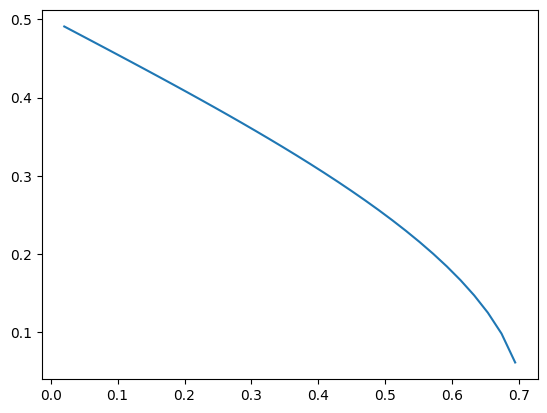

/var/folders/s2/myvbmwhd6_q3sbxkqwg5whp80000gn/T/ipykernel_54902/3412581520.py:5: RuntimeWarning: divide by zero encountered in divide
  A = (r_o**2 + r*c - 1/2)/(2*r_o*r)


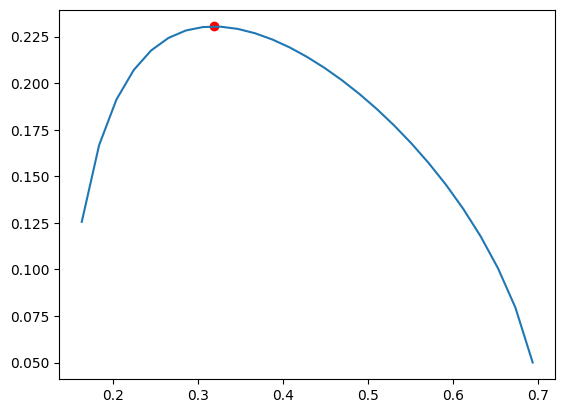

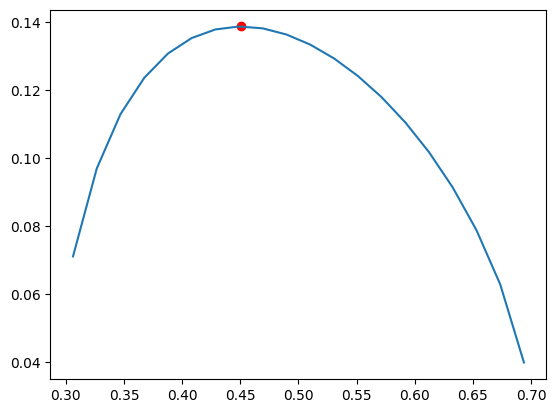

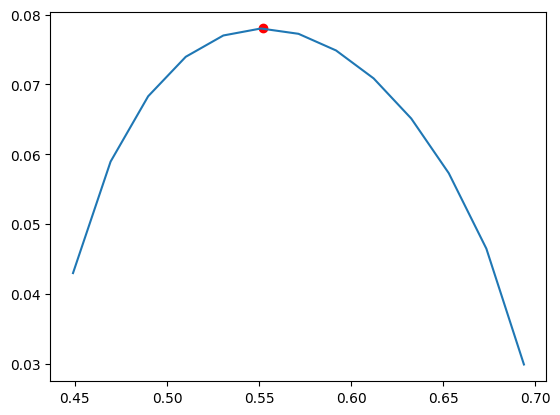

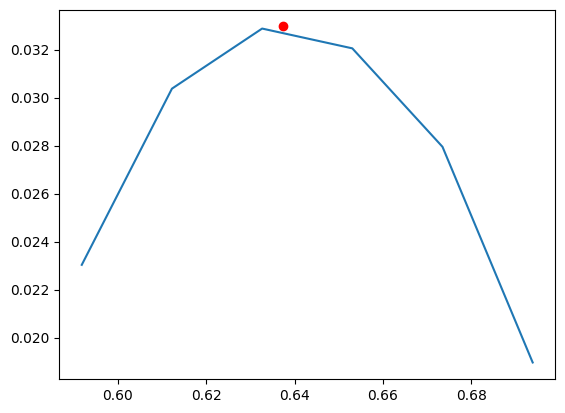

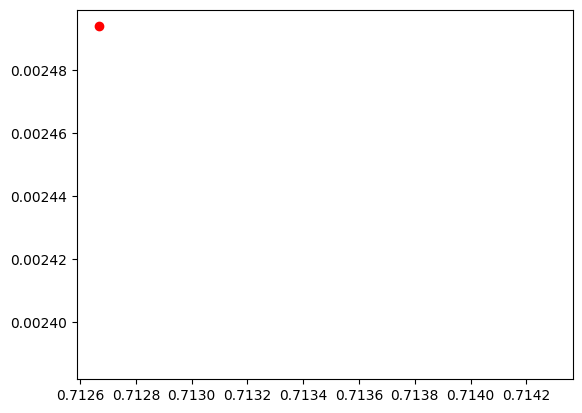

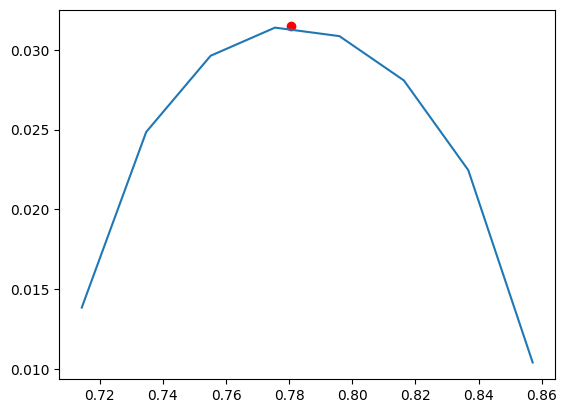

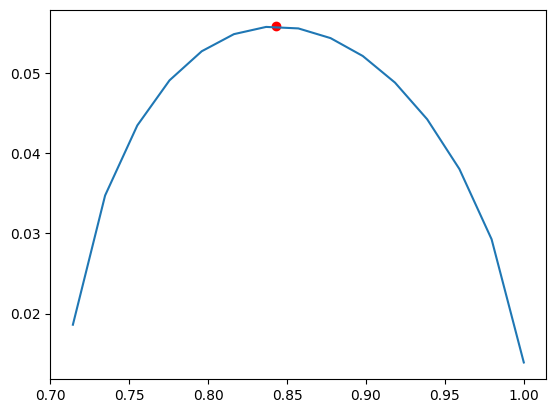

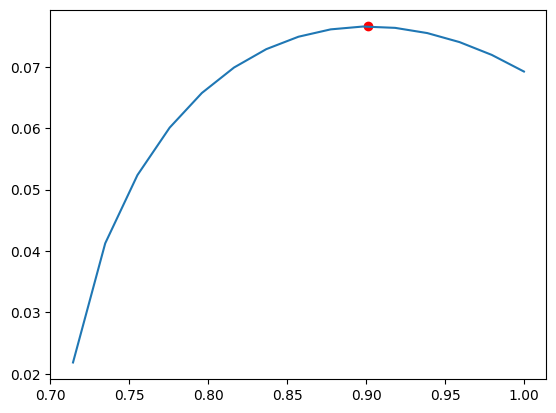

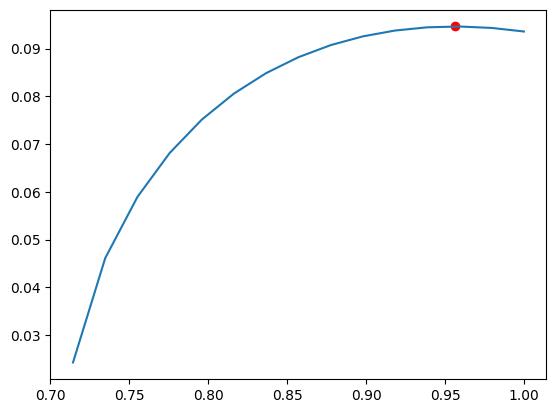

In [248]:
# wideness of the angle in function of r_o and r
def wideness(r, r_o):
    c = np.sqrt(2)
    # r_o = opt_move_Eerin(r)
    A = (r_o**2 + r*c - 1/2)/(2*r_o*r)
    return np.arccos(A)/pi



r_values = np.linspace(a,1,10)
r_o_values = np.linspace(0,1,50)
for r in r_values:
    y_values = wideness(r,r_o_values)
    plt.plot(r_o_values,y_values)
    k = opt_move_Eerin(r)
    plt.scatter(k, wideness(r,k), color='red', label='Point')
    plt.show()
    # print(r,opt_move_Eerin(r))
    # print(wide_values)

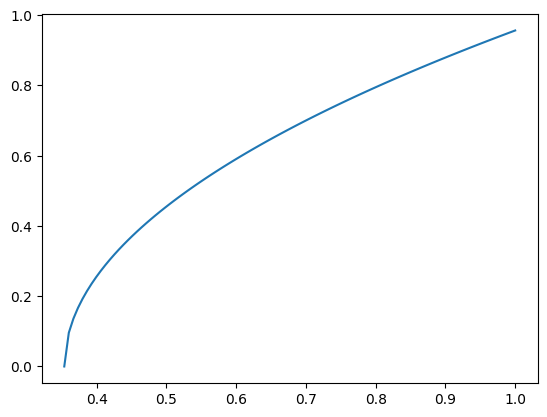

In [241]:
x_values = np.linspace(a,1, 100)
y_values = opt_move_Eerin(x_values)

plt.plot(x_values,y_values)
plt.show()

In [250]:
0.0711384 + 0.125 

0.1961384